# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Anjali Singh <br>
Roll Number: 2020102004

### Dataset

Use the code below to load the Dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

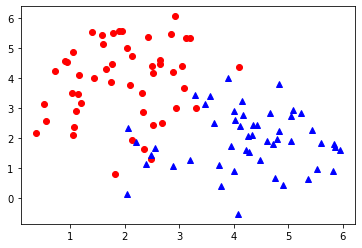

In [5]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [6]:
# function to normalize feature matrix, X

# logistic function: sigmoid function
# f(x) = 1/(1+e^(-x))

def sigmoid(x):
    f = 1.0/(1+np.exp(-x))

    return f

def log_gradient(X, y, beta):
    m = len(y)
    z = np.dot(X, beta.T)
    A = sigmoid(z)
    final_calc = (1/m)*np.dot(X, A-y)

    return final_calc
    

In [7]:
# J for logistic regression is inversely proportional to the likelihood of parameters

def costFunc(beta, X, y):
    # J = cost function or loss function 
    z = np.dot(X, beta.T)
    logisticFunc_v = sigmoid(z)
    y = np.squeeze(y)

    step1 = y*(np.log(logisticFunc_v))
    step2 = (1-y)*(np.log(1 - logisticFunc_v))

    final = - step1 - step2
    final_mean = np.mean(final)

    return final_mean

def gradientFunc(X, y, beta, lr = 0.01, convergeChange = 0.001):
    cost = costFunc(beta, X, y)
    change_cost = 1
    num_iterations = 1

    while(change_cost > convergeChange):
        old_cost = cost 
        beta = beta - (lr*log_gradient(X, y, beta).T)

        cost = costFunc(beta, X, y)

        change_cost = old_cost - cost
        num_iterations += 1
    
    return beta, num_iterations
    

In [8]:
# function to predict values
def predictValues(beta, X):
    z = np.dot(X.any(), beta)
    pred_prob = sigmoid(z)
    # pred_prob = logisticFunc(beta, X.any())

    if (pred_prob.all() >= 0.5):
        pred_value = 1
    else:
        pred_value = 0
    
    # np.squeeze is used where we want the 2D array from a 3D array
    return np.squeeze(pred_value)

# function to plot the decision boundary

def plot_reg(X, y, beta):
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]

    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0, 0] + beta[0, 1]*x1)/beta[0, 2]

    plt.plot(X[:,0][y==0], X[:,1][y==0], 'o', color = 'red')
    plt.plot(X[:,0][y==1], X[:,1][y==1], '^', color = 'blue')

    plt.plot(x1, x2, c = 'k', label = 'Regression Line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

In [9]:
if __name__ == "__main__":

    # .T: takes the transpose 
    # X = normalize(X)
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

    y = X[:, -1]
 
    # initial beta values
    beta = np.zeros((X.shape[1], 1))
    # beta = np.matrix(np.zeros(X.shape[1]))
 
    # beta values after running gradient descent
    beta, num_iter = gradientFunc(X, y, beta)
 
    # estimated beta values and number of iterations
    print("Estimated regression coefficients:", beta)
    print("No. of iterations:", num_iter)
 
    # predicted labels
    y_pred = predictValues(beta, X)
     
    # number of correctly predicted labels
    print("Correctly predicted labels:", np.sum(y == y_pred))
     
    # plotting regression line
    plot_reg(X, y, beta)

ValueError: shapes (100,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

<b> Q1. Explain the approach of Logistic Regression. </b> <br>


<b> Q2. What is the loss function used? </b> <br>

The loss function used for logistic regression is as follows: - <br>

$$ 
cost(h_{\theta}(x), y) = {\begin{cases} -log(h_{\theta}(x)) \space\space\space\space if \space\space y = 1 \\ -log(1-h_{\theta}(x)) \space\space\space\space if \space\space y = 0 \end{cases}}  
$$

This gives us a non-convex loss function. 

<b> Q3. Explain if we can use Mean Square Error (MSE) as loss function. </b> <br>

No, we cannot use the MSE as loss function. This is because, we use the sigmoid function in logistic regression and we do non-linear transformations to obtain the probabiities. Using MSE, we'll need to square the non-linear transformations which leads to non-convexity with local minimums. And thereby, it becomes almost next to impossible to find the global minimum using gradient descent. 